In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Doubling time (years)')

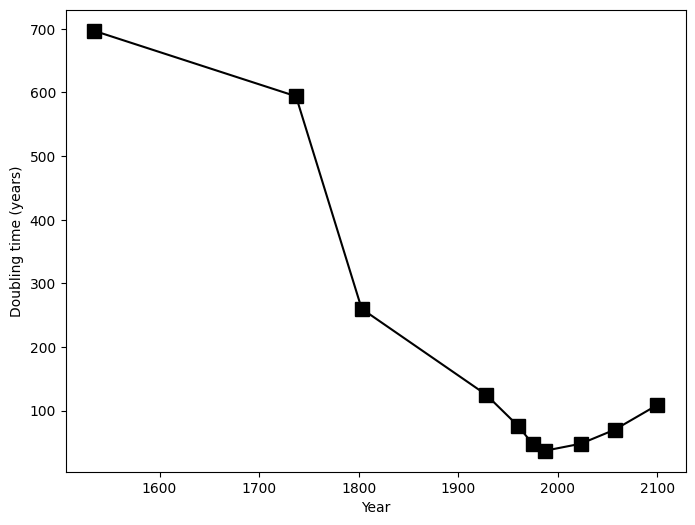

In [2]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)

# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10)

plt.xlabel('Year')
plt.ylabel('Doubling time (years)')

In [13]:
# design matrix for a 3rd-order polynomial
X = np.zeros((N,4))

# build the design matrix (note the range "4" because of indexing 0-3)
for i in range(4): 
  X[:,i] = np.array(year)**i

# converted to ints for your viewing pleasure
print(X)

[[ 1.00000000e+00  1.53400000e+03  2.35315600e+06 -6.85225992e+08]
 [ 1.00000000e+00  1.73700000e+03  3.01716900e+06  9.45855257e+08]
 [ 1.00000000e+00  1.80300000e+03  3.25080900e+06  1.56624133e+09]
 [ 1.00000000e+00  1.92800000e+03  3.71718400e+06 -1.42320384e+09]
 [ 1.00000000e+00  1.96000000e+03  3.84160000e+06 -1.06039859e+09]
 [ 1.00000000e+00  1.97500000e+03  3.90062500e+06 -8.86200217e+08]
 [ 1.00000000e+00  1.98700000e+03  3.94816900e+06 -7.44922789e+08]
 [ 1.00000000e+00  2.02300000e+03  4.09252900e+06 -3.10748425e+08]
 [ 1.00000000e+00  2.05700000e+03  4.23124900e+06  1.13744601e+08]
 [ 1.00000000e+00  2.10000000e+03  4.41000000e+06  6.71065408e+08]]


Text(0, 0.5, 'Doubling time (years)')

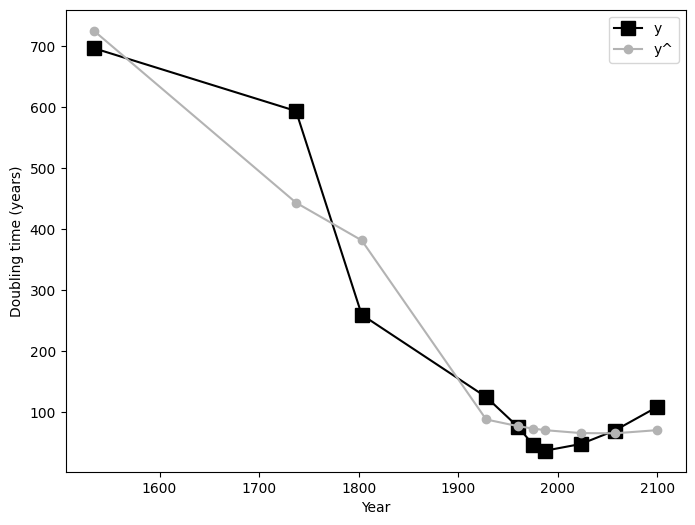

In [10]:
# compute the regression coefficients
beta = np.linalg.lstsq(X,doubleTime, rcond=None)

# and the predicted data
yHat = X@beta[0]

# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'y')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'y^')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')

Text(0, 0.5, 'Doubling time (years)')

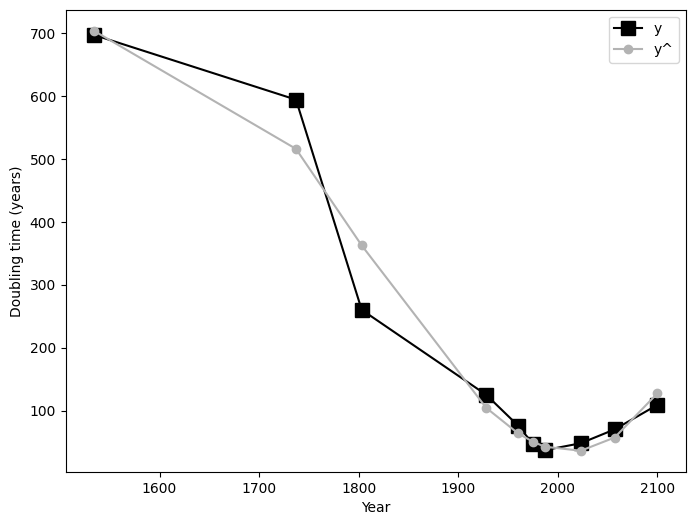

In [14]:
beta = np.polyfit(year,doubleTime,3)
yHat = np.polyval(beta,year)

# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label=r'y')
plt.plot(year,yHat,'o-',color=[.7,.7,.7],label=r'y^')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')

C:\Users\MVKiselev\AppData\Local\Temp\ipykernel_47732\1714160230.py:5: RankWarning: Polyfit may be poorly conditioned
  beta = np.polyfit(year,doubleTime,oi)


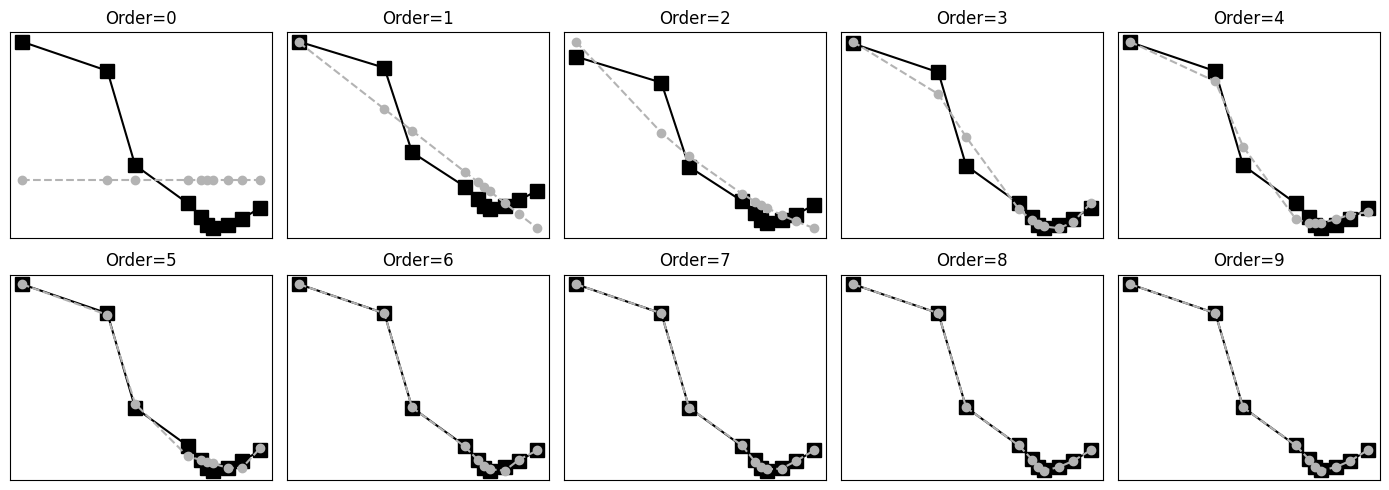

In [15]:
_,axs = plt.subplots(2,5,figsize=(14,5))
axs = axs.flatten()

for oi in range(N):
  beta = np.polyfit(year,doubleTime,oi)
  yHat = np.polyval(beta,year)

  # plot
  axs[oi].plot(year,doubleTime,'ks-',markersize=10)
  axs[oi].plot(year,yHat,'o--',color=[.7,.7,.7])
  axs[oi].set(xticks=[], yticks=[])
  axs[oi].set_title('Order=%g' %oi)

plt.tight_layout()